In [44]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as st 
import os
from tqdm import tqdm
os.chdir('D:\Shashi Katteri\Desktop\data sets to work on\indian-liver-patient-records')

In [100]:
df=pd.read_csv('indian_liver_patient.csv')

In [101]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [48]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [49]:
df.Dataset.value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [102]:
df1=df

In [103]:
df1['Dataset']=df1['Dataset'].apply(lambda x:0 if x==2 else x)

In [104]:
df1.Dataset.value_counts()

1    416
0    167
Name: Dataset, dtype: int64

In [105]:
df1=df1.fillna(method='bfill')

In [106]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    583 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [55]:
#sns.pairplot(data=df1,diag_kind='kde',hue='Dataset')

In [56]:
df1.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.218511,0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.207954,0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.201974,0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.236543,0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.004714,0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.071585,0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233764,-0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.688138,-0.161388
Albumin_and_Globulin_Ratio,-0.218511,-0.207954,-0.201974,-0.236543,-0.004714,-0.071585,0.233764,0.688138,1.000000,-0.166694
Dataset,0.137351,0.220208,0.246046,0.184866,0.163416,0.151934,-0.035008,-0.161388,-0.166694,1.000000


In [107]:
df1=pd.get_dummies(df1,columns=['Gender'],drop_first=True)

In [108]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    583 non-null float64
Dataset                       583 non-null int64
Gender_Male                   583 non-null uint8
dtypes: float64(5), int64(5), uint8(1)
memory usage: 46.2 KB


In [64]:
df1.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset',
       'Gender_Male'],
      dtype='object')

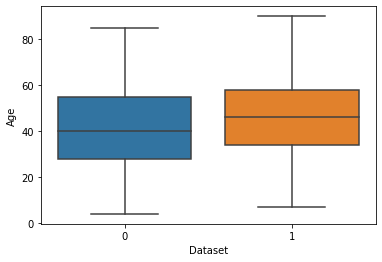

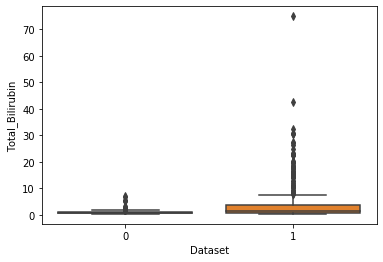

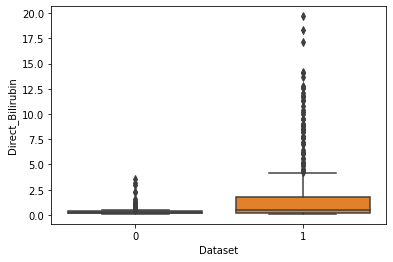

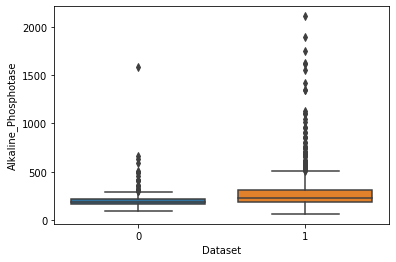

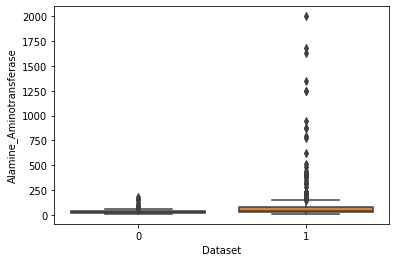

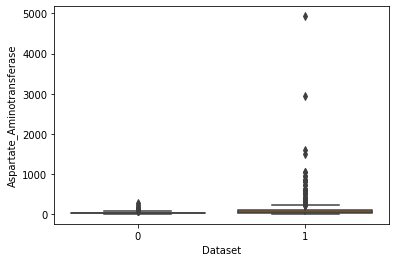

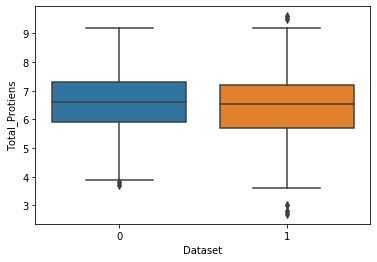

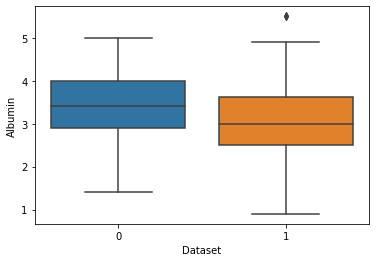

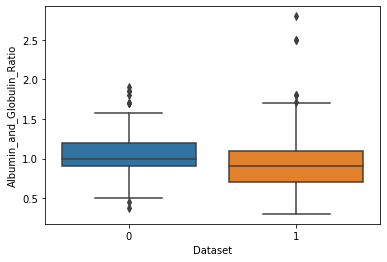

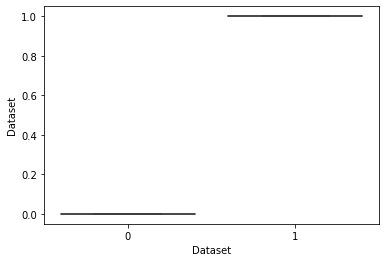

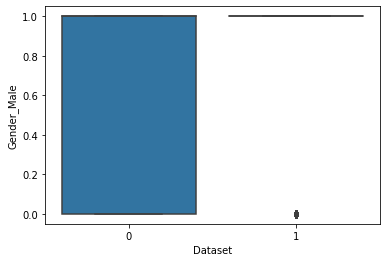

In [59]:
for i in df1.columns:
    sns.boxplot(y=df1[i],x=df1['Dataset'])
    plt.show()

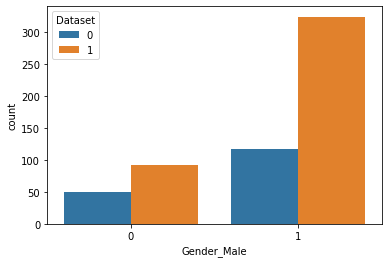

In [60]:
sns.countplot(df1['Gender_Male'],hue=df1['Dataset'])

In [61]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score

In [63]:
df2=df1
d_0=df2[df2.Dataset==0]
d_1=df2[df2.Dataset==1]

In [65]:
cols=['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase']
new_cols=['High Total_Bilirubin', 'High Direct_Bilirubin', 'High Alkaline_Phosphotase',
       'High Alamine_Aminotransferase', 'High Aspartate_Aminotransferase']

In [68]:

    

for i in range(5):
    m=max(d_0[cols[i]])
    df2[new_cols[i]]=df2[cols[i]].apply(lambda x:1 if x>m else 0)

In [71]:
for i in new_cols:
    print('\n',df2[i].value_counts(),'\n')


 0    521
1     62
Name: High Total_Bilirubin, dtype: int64 


 0    518
1     65
Name: High Direct_Bilirubin, dtype: int64 


 0    578
1      5
Name: High Alkaline_Phosphotase, dtype: int64 


 0    542
1     41
Name: High Alamine_Aminotransferase, dtype: int64 


 0    543
1     40
Name: High Aspartate_Aminotransferase, dtype: int64 



In [72]:
x=df2.drop('Dataset',axis=1)
y=df2['Dataset']

In [73]:
def mod_score(algo,x,y,params=None):
    cv1=cross_val_score(algo,x,y,cv=5,scoring='accuracy')
    cv2=cross_val_score(algo,x,y,cv=5,scoring='roc_auc')
    print('Accuracy : ',cv1.mean())
    print('ROC AUC score : ',cv2.mean())
    
    

In [120]:
def rand_search(algo,params,x,y):
    rs=RandomizedSearchCV(algo,param_distributions=params,random_state=0,n_jobs=-1,n_iter=100,scoring='roc_auc',cv=10)
    mod=rs.fit(x,y)
    print(mod.best_score_)
    return mod.best_params_

In [75]:
rfc_params={'n_estimators':st.randint(50,300),
    'criterion':['gini','entropy'],
    'max_depth':st.randint(2,20),
    'min_samples_split':st.randint(2,100),
    'min_samples_leaf':st.randint(2,100)}
lgb_params={ 'num_leaves':st.randint(31,60),
   'max_depth':st.randint(2,20),
    'learning_rate':st.uniform(0,1),
    'n_estimators':st.randint(50,300),
    'min_split_gain':st.uniform(0,0.3)}

In [76]:
rbp=rand_search(RandomForestClassifier(),rfc_params,x,y)

0.7501050420168067


In [77]:
lbp=rand_search(LGBMClassifier(),lgb_params,x,y)

0.7466309694609551


In [125]:
models={'Logistic Regression':LogisticRegression(solver='liblinear'),'Random Forest':RandomForestClassifier(**rbp),
       'Light GBM(Boosting)':LGBMClassifier(**lbp),'Gausian Naive Bayes':GaussianNB()
       }
params={'Logistic Regression':{'solver':'liblinear'},'Random Forest':rbp,
       'Light GBM(Boosting)':lbp,'Gausian Naive Bayes':None}

In [79]:
for i in models.keys():
    print(i,'\n')
    mod_score(models[i],x,y)
    print('\n')

Logistic Regression 

Accuracy :  0.708458591217212
ROC AUC score :  0.7543248624751104


Random Forest 

Accuracy :  0.6980695549661067
ROC AUC score :  0.7416565677019256


Light GBM(Boosting) 

Accuracy :  0.6758768051871501
ROC AUC score :  0.7150303275746224


Gausian Naive Bayes 

Accuracy :  0.4837312113174182
ROC AUC score :  0.7379607556786862




In [109]:
df3=df1
df3.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset',
       'Gender_Male'],
      dtype='object')

In [82]:
lims={'Total_Bilirubin':(1,1.3),'Direct_Bilirubin':(0,0.3),'Alkaline_Phosphotase':(40,140),'Aspartate_Aminotransferase':(0,40),
     'Alamine_Aminotransferase':(0,40)}

In [116]:
for i in lims:
    j=lims[i]
    df3[i+'_not_norm']=0
    df3[i+'_not_norm']=df3[i].apply(lambda x:0 if (x<j[1]) and (x>j[0]) else 1)

In [117]:
#df3=df3.drop(['High Total_Bilirubin', 'High Direct_Bilirubin',
 #      'High Alkaline_Phosphotase', 'High Alamine_Aminotransferase',
  #     'High Aspartate_Aminotransferase'],axis=1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 16 columns):
Age                                    583 non-null int64
Total_Bilirubin                        583 non-null float64
Direct_Bilirubin                       583 non-null float64
Alkaline_Phosphotase                   583 non-null int64
Alamine_Aminotransferase               583 non-null int64
Aspartate_Aminotransferase             583 non-null int64
Total_Protiens                         583 non-null float64
Albumin                                583 non-null float64
Albumin_and_Globulin_Ratio             583 non-null float64
Dataset                                583 non-null int64
Gender_Male                            583 non-null uint8
Total_Bilirubin_not_norm               583 non-null int64
Direct_Bilirubin_not_norm              583 non-null int64
Alkaline_Phosphotase_not_norm          583 non-null int64
Aspartate_Aminotransferase_not_norm    583 non-null int64
Alamine_Aminotr

In [118]:
c=['Total_Bilirubin_not_norm',
       'Direct_Bilirubin_not_norm', 'Alkaline_Phosphotase_not_norm',
       'Aspartate_Aminotransferase_not_norm',
       'Alamine_Aminotransferase_not_norm']
for i in c:
    vc=df3[i].value_counts()
    print('\n',vc)


 1    556
0     27
Name: Total_Bilirubin_not_norm, dtype: int64

 1    326
0    257
Name: Direct_Bilirubin_not_norm, dtype: int64

 1    551
0     32
Name: Alkaline_Phosphotase_not_norm, dtype: int64

 1    311
0    272
Name: Aspartate_Aminotransferase_not_norm, dtype: int64

 0    327
1    256
Name: Alamine_Aminotransferase_not_norm, dtype: int64


In [119]:
x1=df3.drop('Dataset',axis=1)

In [136]:
rbp_f=rand_search(RandomForestClassifier(),rfc_params,x1,y)

0.749200655872105


In [137]:
lbp_f=rand_search(LGBMClassifier(),lgb_params,x1,y)

0.7247550087108015


In [128]:
models_f={'Logistic Regression':LogisticRegression(solver='liblinear',max_iter=1000),'Random Forest':RandomForestClassifier(**rbp_f),
       'Light GBM(Boosting)':LGBMClassifier(**lbp_f),'Gausian Naive Bayes':GaussianNB()
       }
params={'Logistic Regression':{'solver':'liblinear'},'Random Forest':rbp,
       'Light GBM(Boosting)':lbp,'Gausian Naive Bayes':None}

In [138]:
for i in models_f.keys():
    print(i,'\n')
    mod_score(models_f[i],x1,y)
    print('\n')

Logistic Regression 

Accuracy :  0.715281461833186
ROC AUC score :  0.7534056265806799


Random Forest 

Accuracy :  0.7048924255820809
ROC AUC score :  0.7331503758860244


Light GBM(Boosting) 

Accuracy :  0.6690097259062776
ROC AUC score :  0.7084713695627942


Gausian Naive Bayes 

Accuracy :  0.5747273798997937
ROC AUC score :  0.7403913080383668




## KNN


In [134]:
knn=KNeighborsClassifier()
params_kn={'n_neighbors':st.randint(5,100)}
kbp1=rand_search(knn,params_kn,x1_s,y)
kbp=rand_search(knn,params_kn,x_s,y)
ss=StandardScaler()
x_s=ss.fit_transform(x)
x1_s=ss.fit_transform(x1)
mod_score(knn,x_s,y)
mod_score(knn,x1_s,y)

0.7339545116827219
0.7243266208922592
Accuracy :  0.6415414087827882
ROC AUC score :  0.6271333359923013
Accuracy :  0.6655467138225759
ROC AUC score :  0.6554964446530711


In [135]:
x1['ast/alt']=x1['Aspartate_Aminotransferase']/x1['Alamine_Aminotransferase']